# **Load and explore data**

In [1]:
import os
print(os.listdir('../input/game-of-thrones'))

['character-predictions.csv', 'battles.csv', 'character-deaths.csv']


In [2]:
import pandas as pd
data = pd.read_csv("../input/game-of-thrones/character-predictions.csv")
data.head()

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


In [3]:
data['actual'].value_counts()

actual
1    1451
0     495
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

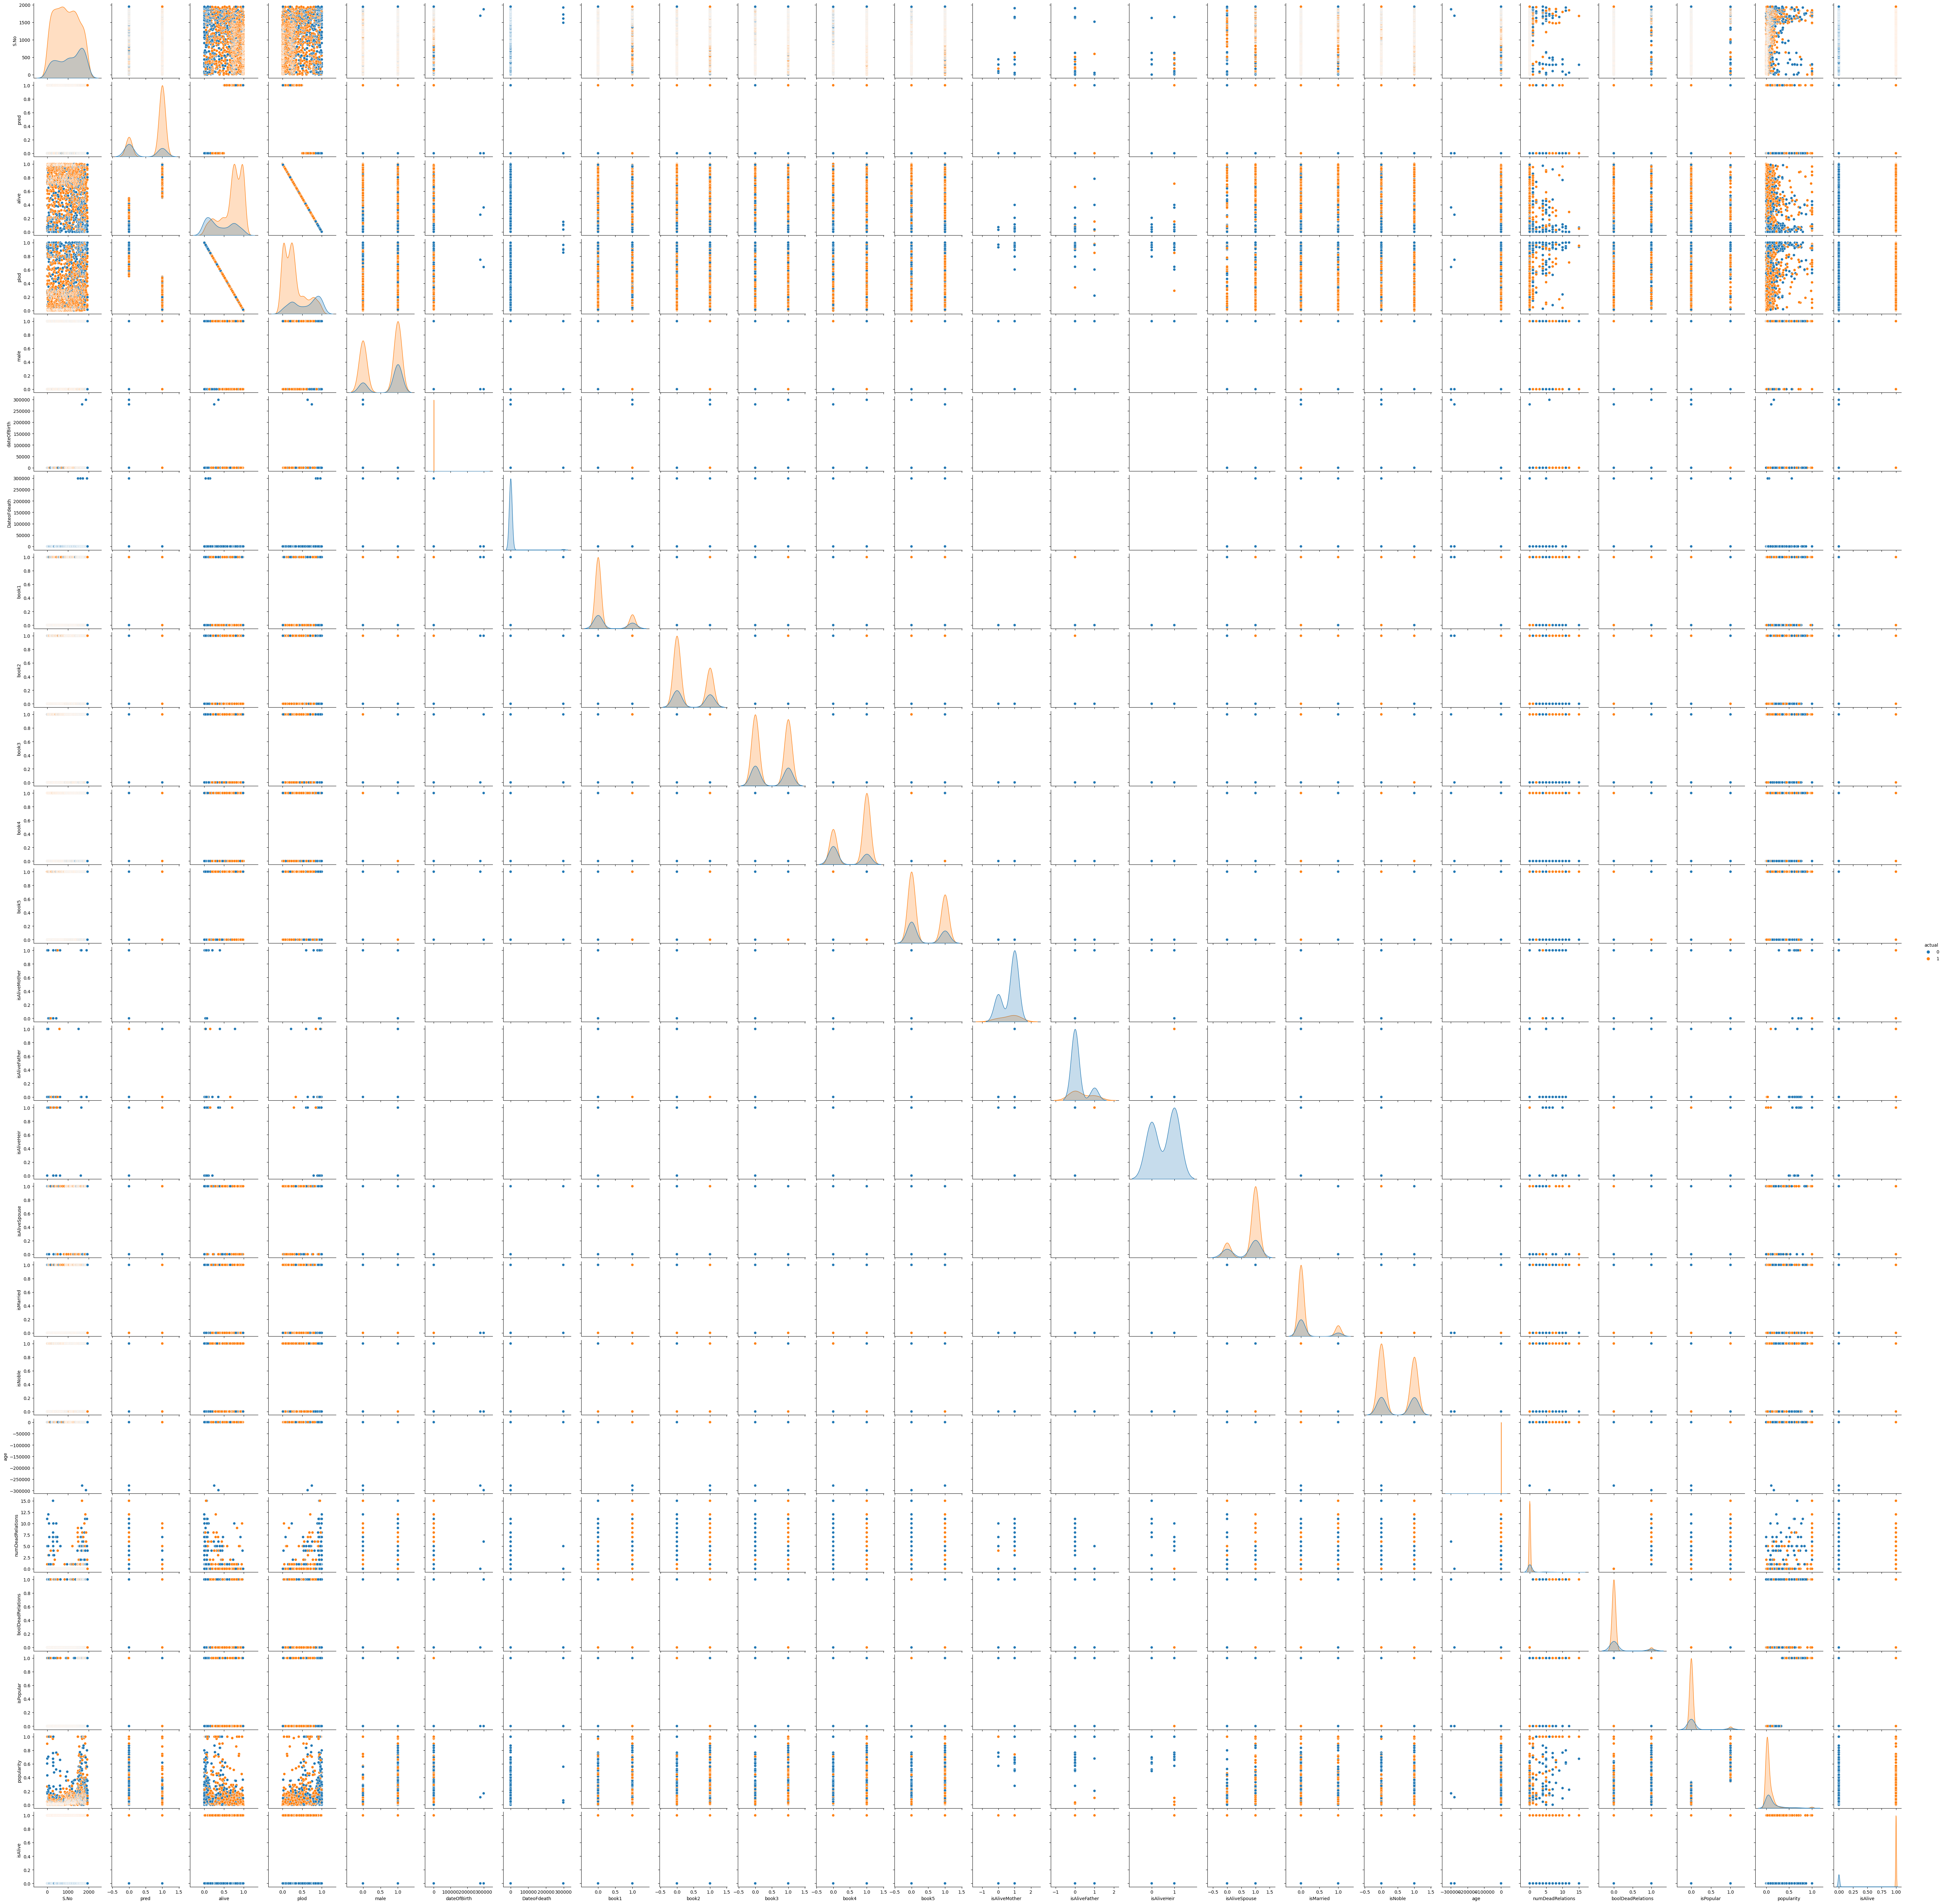

In [4]:
import seaborn as sns
colors = ['red','blue','green']
sns.pairplot(data, hue="actual")

In [5]:
Y = data.actual.values
data = data.drop(["actual","name", "alive", "pred", "plod", "isAlive", "dateOfBirth", "DateoFdeath"], axis=1)

In [6]:
data.head()

,S.No,title,male,culture,mother,father,heir,house,spouse,book1,...,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity
0,1,NaN,1,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,...,0.0,0.0,NaN,0,0,NaN,11,1,1,0.605351
1,2,Lord of the Crossing,1,Rivermen,NaN,NaN,NaN,House Frey,Perra Royce,1,...,NaN,NaN,1.0,1,1,97.0,1,1,1,0.896321
2,3,Ser,1,NaN,NaN,NaN,NaN,House Swyft,NaN,0,...,NaN,NaN,NaN,0,1,NaN,0,0,0,0.267559
3,4,Queen,0,NaN,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,...,NaN,NaN,0.0,1,1,23.0,0,0,0,0.183946
4,5,Greenstone,0,Dornish,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,...,NaN,NaN,1.0,1,1,29.0,0,0,0,0.043478


**Gender distribution**

In [7]:
data['male'].value_counts()

male
1    1205
0     741
Name: count, dtype: int64

# **One hot encoding**

In [8]:
object_cols = [col for col in data.columns if data[col].dtype == "object"]
object_cols

['title', 'culture', 'mother', 'father', 'heir', 'house', 'spouse']

Unique entries by column

In [9]:
object_nunique = list(map(lambda col: data[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

sorted(d.items(), key=lambda x: x[1])

[('mother', 17),
 ('father', 20),
 ('heir', 22),
 ('culture', 64),
 ('spouse', 254),
 ('title', 262),
 ('house', 347)]

# **Missing values**

In [10]:
data.isnull().sum()

S.No                    0
title                1008
male                    0
culture              1269
mother               1925
father               1920
heir                 1923
house                 427
spouse               1670
book1                   0
book2                   0
book3                   0
book4                   0
book5                   0
isAliveMother        1925
isAliveFather        1920
isAliveHeir          1923
isAliveSpouse        1670
isMarried               0
isNoble                 0
age                  1513
numDeadRelations        0
boolDeadRelations       0
isPopular               0
popularity              0
dtype: int64

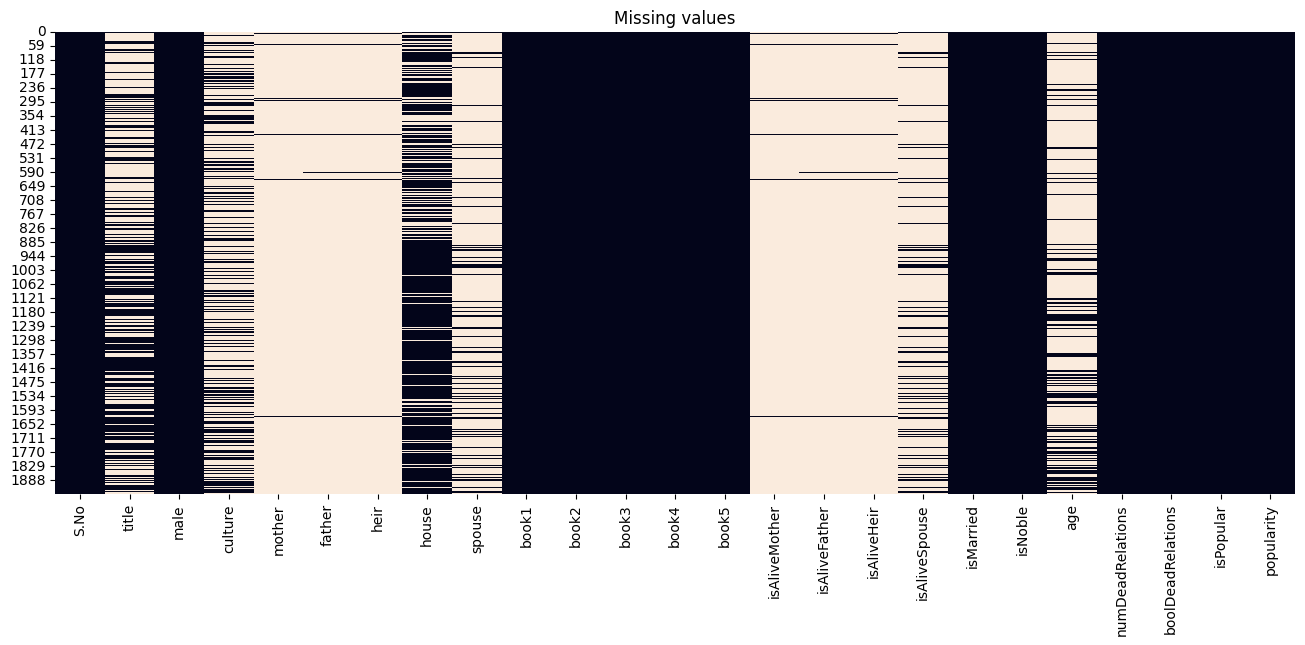

In [11]:
import matplotlib.pyplot as plt


plt.figure(figsize=(16, 6))
sns.heatmap(data.isnull(), cbar=False)
plt.title('Missing values')
plt.show()

In [12]:
cols = [col for col in data.columns if data[col].isnull().any()]
data = data.drop(cols,axis=1)

<Axes: >

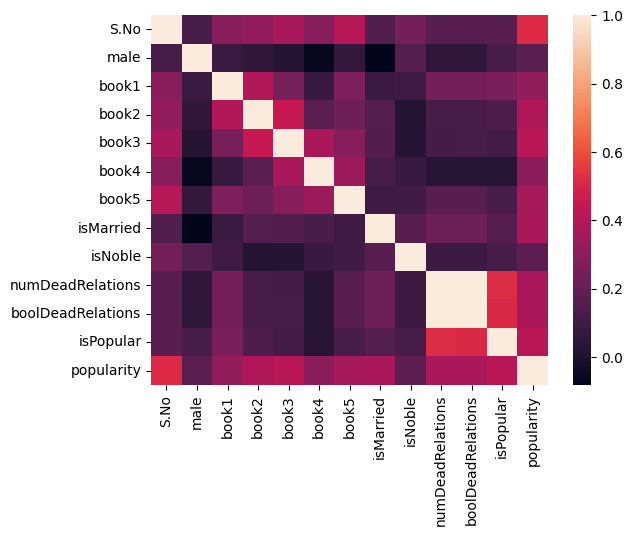

In [13]:
sns.heatmap(data.corr("spearman"))

# **Predictions**

Split dataset

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

X = data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# **Naive Bayes**

In [15]:
from sklearn.naive_bayes import GaussianNB 

naivebayes = GaussianNB()
naivebayes.fit(X_train, y_train)
preds = naivebayes.predict(X_test)

print('NB results:')
print(f'Accuracy: {accuracy_score(preds, y_test)}')
print(f'Precision: {precision_score(preds, y_test, average="micro")}')
print(f'Recall: {recall_score(preds, y_test, average="micro")}')
print(f'F1 score: {f1_score(preds, y_test, average="micro")}')

NB results:
Accuracy: 0.7769230769230769
Precision: 0.7769230769230769
Recall: 0.7769230769230769
F1 score: 0.7769230769230768


# **Linear Discriminant Analysis**

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
preds = lda.predict(X_test)

print('LDA results:')
print(f'Accuracy: {accuracy_score(preds, y_test)}')
print(f'Precision: {precision_score(preds, y_test, average="micro")}')
print(f'Recall: {recall_score(preds, y_test, average="micro")}')
print(f'F1 score: {f1_score(preds, y_test, average="micro")}')

LDA results:
Accuracy: 0.7897435897435897
Precision: 0.7897435897435897
Recall: 0.7897435897435897
F1 score: 0.7897435897435896


# **Quadratic Discriminant Analysis**

In [17]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
preds = qda.predict(X_test)

print('QDA results:')
print(f'Accuracy: {accuracy_score(preds, y_test)}')
print(f'Precision: {precision_score(preds, y_test, average="micro")}')
print(f'Recall: {recall_score(preds, y_test, average="micro")}')
print(f'F1 score: {f1_score(preds, y_test, average="micro")}')

QDA results:
Accuracy: 0.7897435897435897
Precision: 0.7897435897435897
Recall: 0.7897435897435897
F1 score: 0.7897435897435896
